In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("housing_price_dataset.csv")

df['YearBuilt'] = pd.to_datetime(df['YearBuilt'], format='%Y').dt.year

df['Price'] = df['Price'].astype(np.int64)
# Remove rows with negative prices
df = df[df['Price'] >= 0]

df['Bedrooms'] = df['Bedrooms'].astype(np.int32)
df['Bathrooms'] = df['Bathrooms'].astype(np.int32)
df['SquareFeet'] = df['SquareFeet'].astype(np.int32)

# Apply ordinal encoding to 'Neighborhood' column
neighborhood_mapping = {'Rural': 1, 'Suburb': 2, 'Urban': 3}
df['Neighborhood'] = df['Neighborhood'].map(neighborhood_mapping)

# Separate features and target variable
X = df[['Bedrooms', 'Bathrooms', 'SquareFeet', 'Neighborhood', 'YearBuilt']]
y = df['Price']

# Split the data into training and testing sets for model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

bedroom_multiplier = round(model.coef_[0], 2)
bathroom_multiplier = round(model.coef_[1], 2)
sf_multiplier = round(model.coef_[2], 2)
neighborhood_multiplier = round(model.coef_[3], 2)
buildyear_multiplier = round(model.coef_[4], 2)

while True:
    print("Enter home data for an estimate. Press -1 on any answer to exit")

    user_bedrooms = input("Number of bedrooms (between 2 and 5): ")
    if user_bedrooms == "-1":
        print("Exiting program")
        break

    user_bathrooms = input("Number of bathrooms (between 1 and 3): ")
    if user_bathrooms == "-1":
        print("Exiting program")
        break

    try:
        user_bathrooms_int = int(user_bedrooms)
    except ValueError:
        print("Invalid entry")
        continue

    user_sf = input("Home square footage (between 1000 and 2999): ")
    if user_sf == "-1":
        print("Exiting program")
        break

    user_neighborhood = input("Neighborhood type (1 for Rural, 2 for Suburb, 3 for Urban): ")
    if user_neighborhood == "-1":
        print("Exiting program")
        break

    user_buildyear = input("Year built (between 1950 and 2021): ")
    if user_buildyear == "-1":
        print("Exiting program")
        break

    try:
        user_bedrooms_int = int(user_bedrooms)
        user_bathrooms_int = int(user_bathrooms)
        user_sf_int = int(user_sf)
        user_neighborhood_int = int(user_neighborhood)
        user_buildyear_int = int(user_buildyear)

    except ValueError:
        print("Invalid entry for one of the inputs. Please enter valid integers.")
        continue

    if user_bedrooms_int < 2 or user_bedrooms_int > 5:
        print("Invalid entry. Bedrooms must be between 2 and 5")
        continue

    if user_bathrooms_int < 1 or user_bathrooms_int > 3:
        print("Invalid entry. Bedrooms must be between 1 and 3")
        continue

    if user_sf_int > 2999 or user_sf_int < 1000:
        print("Invalid entry. Square footage must be between 1000 and 2999.")
        continue

    if user_neighborhood_int < 1 or user_neighborhood_int > 3:
        print("Invalid entry. Neighborhood entry must be 1, 2, oe 3.")
        continue

    if user_buildyear_int > 2021 or user_buildyear_int < 1950:
        print("Invalid entry. Build year must be between 1950 and 2021.")
        continue

    model_beds = user_bedrooms_int
    model_baths = user_bathrooms_int
    model_sf = user_sf_int
    model_neighborhood = user_neighborhood_int
    model_year = user_buildyear_int

    estimate = round(((model_beds * bedroom_multiplier) + (model_baths * bathroom_multiplier) + (model_sf * sf_multiplier)
                + (model_neighborhood * neighborhood_multiplier) + (model_year * buildyear_multiplier)))

    currency_estimate = "{:,}".format(estimate)

    print("Price estimate: $" + str(currency_estimate))


Enter home data for an estimate. Press -1 on any answer to exit
Number of bedrooms (between 2 and 5): 2
Number of bathrooms (between 1 and 3): 2
Home square footage (between 1000 and 2999): 1852
Neighborhood type (1 for Rural, 2 for Suburb, 3 for Urban): 2
Year built (between 1950 and 2021): 1998
Price estimate: $179,606
Enter home data for an estimate. Press -1 on any answer to exit
Number of bedrooms (between 2 and 5): -1
Exiting program


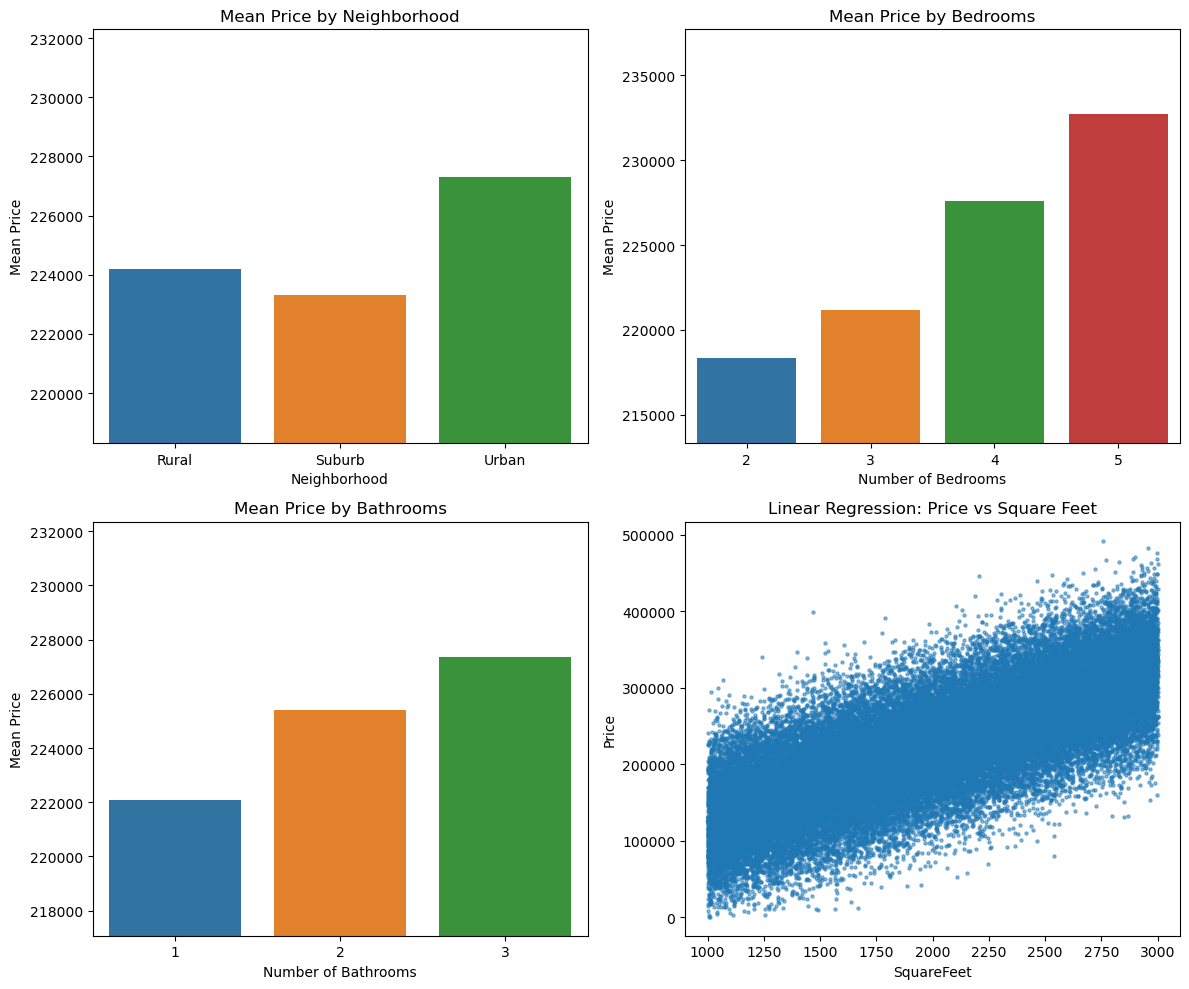

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the following magic command to display Matplotlib plots in the notebook
%matplotlib inline

# Read the csv
df = pd.read_csv("housing_price_dataset.csv")

# Convert 'YearBuilt' column to datetime format
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'], format='%Y').dt.year

# Convert 'Price' column to int64
df['Price'] = df['Price'].astype(np.int64)
# Remove rows with negative prices
df = df[df['Price'] >= 0]

# Convert 'SquareFeet', 'Bedrooms', and 'Bathrooms' to int32
df['Bedrooms'] = df['Bedrooms'].astype(np.int32)
df['Bathrooms'] = df['Bathrooms'].astype(np.int32)
df['SquareFeet'] = df['SquareFeet'].astype(np.int32)

mean_price_by_neighborhood = df.groupby('Neighborhood')['Price'].mean().astype(np.int32)
mean_price_by_bedrooms = df.groupby('Bedrooms')['Price'].mean().astype(np.int32)
mean_price_by_bathrooms = df.groupby('Bathrooms')['Price'].mean().astype(np.int32)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(x=mean_price_by_neighborhood.index, y=mean_price_by_neighborhood.values, ax=axes[0, 0])
axes[0, 0].set_title('Mean Price by Neighborhood')
axes[0, 0].set_xlabel('Neighborhood')
axes[0, 0].set_ylabel('Mean Price')
axes[0, 0].set_ylim(min(mean_price_by_neighborhood.values) - 5000, max(mean_price_by_neighborhood.values) + 5000)

sns.barplot(x=mean_price_by_bedrooms.index, y=mean_price_by_bedrooms.values, ax=axes[0, 1])
axes[0, 1].set_title('Mean Price by Bedrooms')
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Mean Price')
axes[0, 1].set_ylim(min(mean_price_by_bedrooms.values) - 5000, max(mean_price_by_bedrooms.values) + 5000)

sns.barplot(x=mean_price_by_bathrooms.index, y=mean_price_by_bathrooms.values, ax=axes[1, 0])
axes[1, 0].set_title('Mean Price by Bathrooms')
axes[1, 0].set_xlabel('Number of Bathrooms')
axes[1, 0].set_ylabel('Mean Price')
axes[1, 0].set_ylim(min(mean_price_by_bathrooms.values) - 5000, max(mean_price_by_bathrooms.values) + 5000)

sns.regplot(x='SquareFeet', y='Price', data=df, ax=axes[1, 1], scatter_kws={'s': 5, 'alpha': 0.5})
axes[1, 1].set_title('Linear Regression: Price vs Square Feet')

plt.tight_layout()
plt.show()
